<a href="https://colab.research.google.com/github/chenbrilliancesol/machine-learning/blob/main/%E9%B8%A2%E5%B0%BE%E8%8A%B1%EF%BC%88Iris%EF%BC%89%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)

In [4]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names  = iris.target_names

In [5]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("数据预览：\n", df.head(), "\n")

数据预览：
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   



In [6]:
print("数据形状:", df.shape)
print(df.describe().T)
print("类别分布:\n", df['target'].value_counts())

数据形状: (150, 5)
                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
target             150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0
类别分布:
 target
0    50
1    50
2    50
Name: count, dtype: int64


/tmp/ipython-input-2728942212.py:4: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2728942212.py:4: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


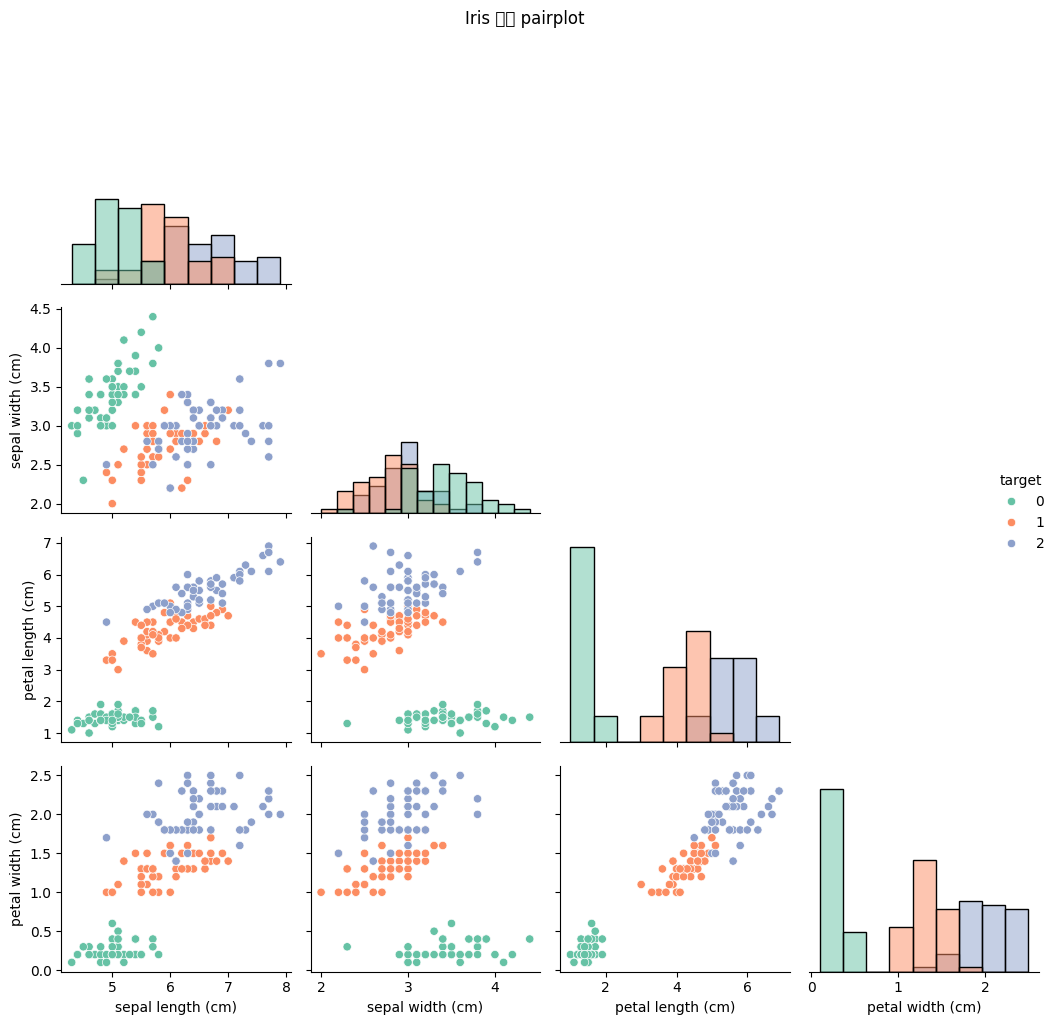

In [7]:
sns.pairplot(df, hue='target', diag_kind='hist',
             palette='Set2', corner=True)
plt.suptitle("Iris 特征 pairplot", y=1.02)
plt.tight_layout()
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
pipe = Pipeline([
    ('scaler', StandardScaler()),  # 第 1 步：标准化
    ('clf',    SVC())              # 第 2 步：支持向量分类器
])

In [11]:
param_grid = {
    'clf__kernel': ['rbf', 'linear'],
    'clf__C':      [0.1, 1, 10],
    'clf__gamma':  ['scale', 0.01, 0.1, 1],
}

In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
grid = GridSearchCV(pipe, param_grid, cv=cv,
                    scoring='accuracy', n_jobs=-1, verbose=1)

In [14]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10],
                         'clf__gamma': ['scale', 0.01, 0.1, 1],
                         'clf__kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=1)

In [15]:
print("最优参数:", grid.best_params_)
print("交叉验证最佳准确率: {:.3f}".format(grid.best_score_))

最优参数: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
交叉验证最佳准确率: 0.975


In [16]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [17]:
print("\n测试集准确率: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("\n分类报告:\n", classification_report(y_test, y_pred,
                                             target_names=target_names))


测试集准确率: 0.933

分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



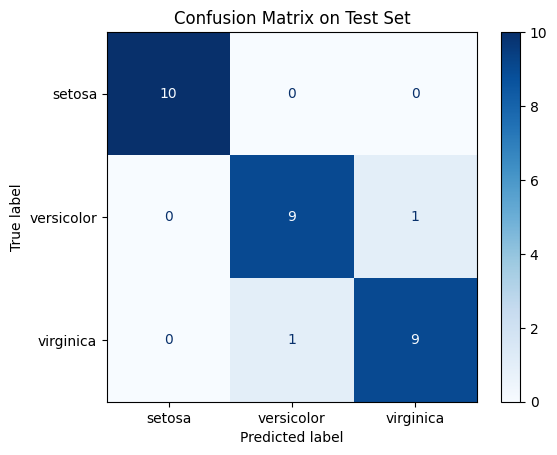

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.show()

In [19]:
os.makedirs("models", exist_ok=True)

In [20]:
model_path = "models/iris_svm_best.joblib"
joblib.dump(best_model, model_path)
print(f"\n模型已保存到 {os.path.abspath(model_path)}")


模型已保存到 /content/models/iris_svm_best.joblib


In [21]:
loaded_model = joblib.load(model_path)
sample = np.array([[5.1, 3.5, 1.4, 0.2]])
pred_label = loaded_model.predict(sample)[0]
print("预测类别:", target_names[pred_label])

预测类别: setosa
